In [1]:
import numpy as np
from svm import *

In [2]:
def load_data(fname):
    """
    载入数据。
    """
    with open(fname, 'r') as f:
        data = []
        line = f.readline()
        for line in f:
            line = line.strip().split()
            x1 = float(line[0])
            x2 = float(line[1])
            t = int(line[2])
            data.append([x1, x2, t])
        return np.array(data)


def show_data(fname):
    data = load_data(fname)
    X1, X2, y = data[:, 0], data[:, 1], data[:, 2]
    plt.scatter(X1, X2, c=y)

In [3]:
    # 载入数据，实际实用时将x替换为具体名称
    train_file = 'data/train_kernel.txt'
    test_file = 'data/test_kernel.txt'
    data_train = load_data(train_file)  # 数据格式[x1, x2, t]
    data_test = load_data(test_file)
    x_test = data_test[:, :2]
    t_test = data_test[:, 2]

## Test kernel

In [4]:
svm = SVM(C=1, kernel='g')
svm.train(data_train)
pred = svm.predict(x_test)
eval_acc(t_test, pred)

0.98

In [5]:
svm = SVM(C=1, kernel='p')
svm.train(data_train)
pred = svm.predict(x_test)
eval_acc(t_test, pred)

0.98

In [9]:
svm = SVM(C=1, kernel='l')
svm.train(data_train)
pred = svm.predict(x_test)
eval_acc(t_test, pred)

0.81

### Try different polynomial kernel

In [5]:
models = []
for i in range(2, 10):
    models.append(SVM(C=1, kernel='p', power=i))
for model in models:
    model.train(data_train)
    pred = model.predict(x_test)
    print(eval_acc(t_test, pred))

0.98
0.98
0.98
0.98
0.98
0.98
0.98
0.98


## Linear

In [10]:
train_file = 'data/train_linear.txt'
test_file = 'data/test_linear.txt'
train = load_data(train_file)
test = load_data(test_file)
test_X, test_y = test[:, 0:2], test[:, 2]

In [11]:
linear = Linear()
logistic = Logistic()

In [13]:
linear.train(train, epochs=100, lr=0.0001, show_loss=False)
test_y_pred = linear.predict(test_X)
eval_acc(test_y, test_y_pred)

0.98

In [14]:
logistic.train(train, lr=0.005, epochs=100, show_loss=False)
pred_y = logistic.predict(test_X)
eval_acc(test_y, pred_y)

0.96

0, loss: 27316.12893161025
Final loss: 21.00818559338185


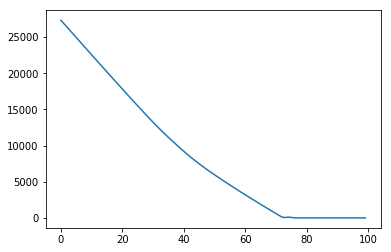

In [15]:
clf = SVM(loss='hinge', kernel='l')
clf.train(train, epochs=100, lr=0.001, l=0.001, show=True)
pred = clf.predict(test_X)

In [16]:
eval_acc(test_y, pred)

0.975

# Multi-class SVM

In [18]:
# 载入数据，实际实用时将x替换为具体名称
train_file = 'data/train_multi.txt'
test_file = 'data/test_multi.txt'
data_train = load_data(train_file)  # 数据格式[x1, x2, t]
data_test = load_data(test_file)
x_test = data_test[:, :2]
t_test = data_test[:, 2]

In [21]:
mclf = multiSVM(n_classes=3, decision_function_shape='ovo')
mclf.train(data_train)
pred = mclf.predict(x_test)
eval_acc(pred, t_test)

0.9666666666666667

In [22]:
models = (
    multiSVM(C=100, n_classes=3, decision_function_shape='ovr', kernel='g'),
    multiSVM(C=100, n_classes=3, decision_function_shape='ovo', kernel='g'),
    
    multiSVM(C=100, n_classes=3, decision_function_shape='ovr', kernel='p'),
    multiSVM(C=100, n_classes=3, decision_function_shape='ovo', kernel='p'),
    
    multiSVM(C=100, n_classes=3, decision_function_shape='ovr', kernel='l'),
    multiSVM(C=100, n_classes=3, decision_function_shape='ovo', kernel='l')
)

for model in models:
    model.train(data_train)
    pred = model.predict(x_test)
    print(eval_acc(pred, t_test))

0.91
0.9566666666666667
0.96
0.9766666666666667
0.9666666666666667
0.9833333333333333
